In [342]:
# First we import all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error 
from termcolor import colored
%matplotlib inline

In [343]:
# we analysise the data and see what values are missing 
df = pd.read_csv('PimaDiabetes.csv')

In [344]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       750 non-null    int64  
 1   Glucose           750 non-null    int64  
 2   BloodPressure     750 non-null    int64  
 3   SkinThickness     750 non-null    int64  
 4   Insulin           750 non-null    int64  
 5   BMI               750 non-null    float64
 6   DiabetesPedigree  750 non-null    float64
 7   Age               750 non-null    int64  
 8   Outcome           750 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.9 KB


In [346]:
# here we can see that there are no null values in our data
df.isnull().any()

Pregnancies         False
Glucose             False
BloodPressure       False
SkinThickness       False
Insulin             False
BMI                 False
DiabetesPedigree    False
Age                 False
Outcome             False
dtype: bool

In [347]:
# Let's take a look at minimum values
df.min()

Pregnancies          0.000
Glucose              0.000
BloodPressure        0.000
SkinThickness        0.000
Insulin              0.000
BMI                  0.000
DiabetesPedigree     0.078
Age                 21.000
Outcome              0.000
dtype: float64

In [348]:
# ok so here we can see that many of these variables cannot have zero as it is not possible
# let's count the number of zeros in each column

In [349]:
df[df == 0.0].count(0)
# here as we can see Insulin has almost half of the values zeros and Skin thickness has 30% values zeros which are a lot

Pregnancies         109
Glucose               5
BloodPressure        35
SkinThickness       221
Insulin             362
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome             490
dtype: int64

In [130]:
# # lets replace zeros with NaN so that we can better visualise it 
# df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
# df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
# df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
# df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
# df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

<AxesSubplot:>

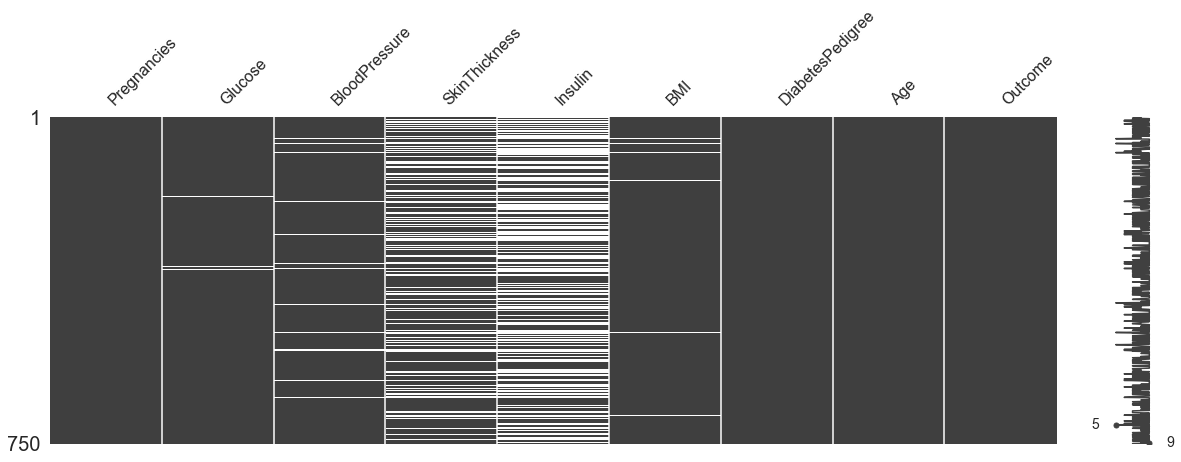

In [131]:
#mno.matrix(df, figsize = (20, 6))
# as we can see skinthickness and insulin has many zeros in them 

In [350]:
# first let's replace 'glucose' bloodpressure and bmi with medians
df.Glucose.replace(0,df.Glucose.median(),inplace=True)
df.BloodPressure.replace(0,df.BloodPressure.median(),inplace=True)
df.BMI.replace(0,df.BMI.median(),inplace=True)

In [351]:
# as we can see there are no zeros left 
df['Glucose'].min()
df['BloodPressure'].min()
df['BMI'].min()

18.2

In [352]:
df.drop(['Insulin','SkinThickness'],axis=1,inplace=True)

In [353]:
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [354]:
df.isnull().any()

Pregnancies         False
Glucose             False
BloodPressure       False
BMI                 False
DiabetesPedigree    False
Age                 False
Outcome             False
dtype: bool

## EDA

<AxesSubplot:>

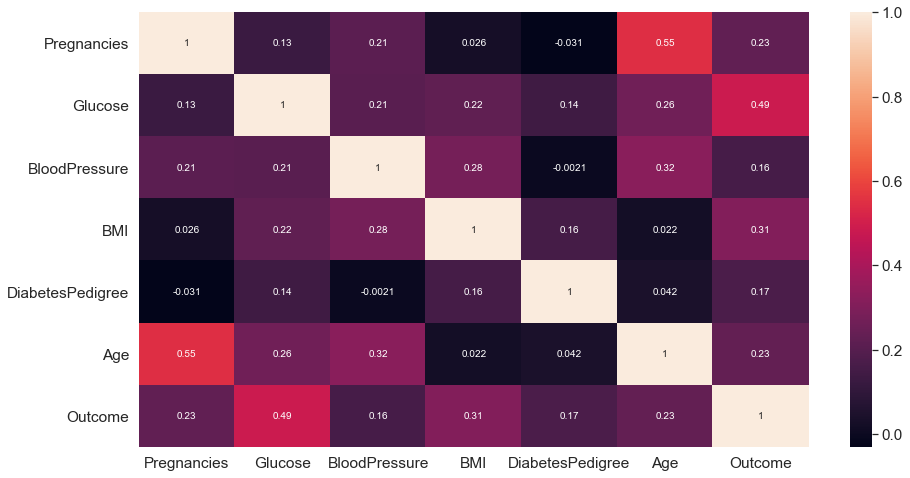

In [357]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'Total count')

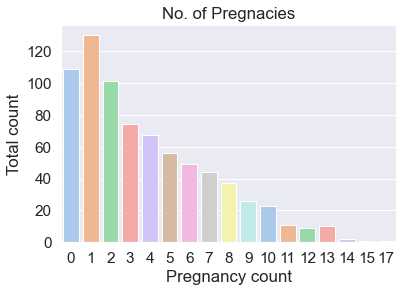

In [358]:
sns.countplot(x=df.Pregnancies,
             palette="pastel").set_title('No. of Pregnacies')
plt.xlabel("Pregnancy count")
plt.ylabel("Total count")

Text(0.5, 1.0, 'Histograph of Age')

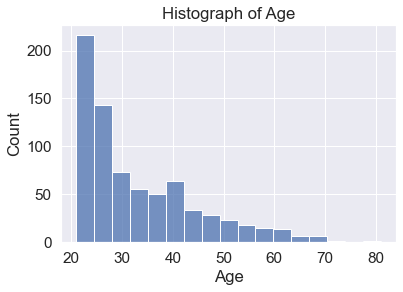

In [359]:
sns.histplot(x=df.Age).set_title("Histograph of Age")

Text(0.5, 1.0, 'BarPlot on Outcome')

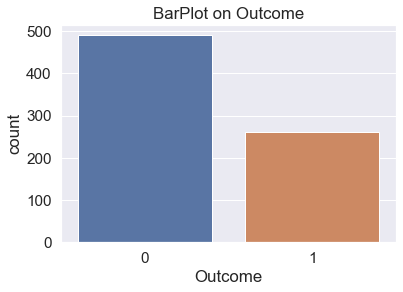

In [360]:
sns.countplot(x=df.Outcome).set_title("BarPlot on Outcome")

<AxesSubplot:xlabel='DiabetesPedigree', ylabel='Count'>

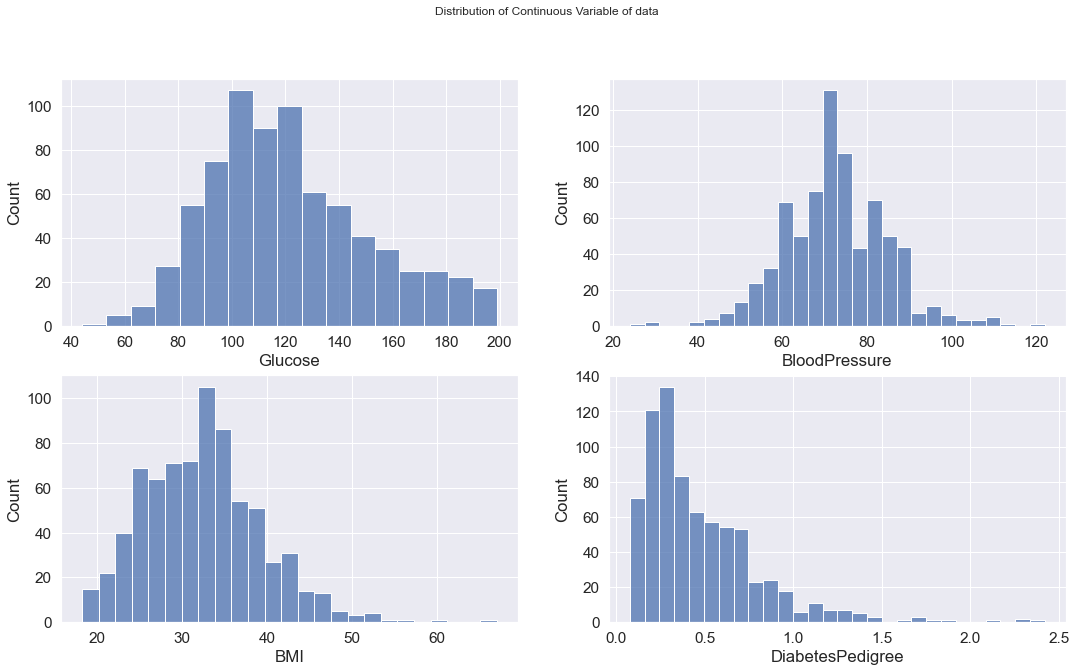

In [362]:
fig, axes = plt.subplots(2, 2, sharey=False,figsize=(18, 10))
  
fig.suptitle('Distribution of Continuous Variable of data')
  
sns.histplot(ax=axes[0, 0], x=df.Glucose)
sns.histplot(ax=axes[0, 1], x=df.BloodPressure)
sns.histplot(ax=axes[1, 0], x=df.BMI)
sns.histplot(ax=axes[1, 1], x=df.DiabetesPedigree)

/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

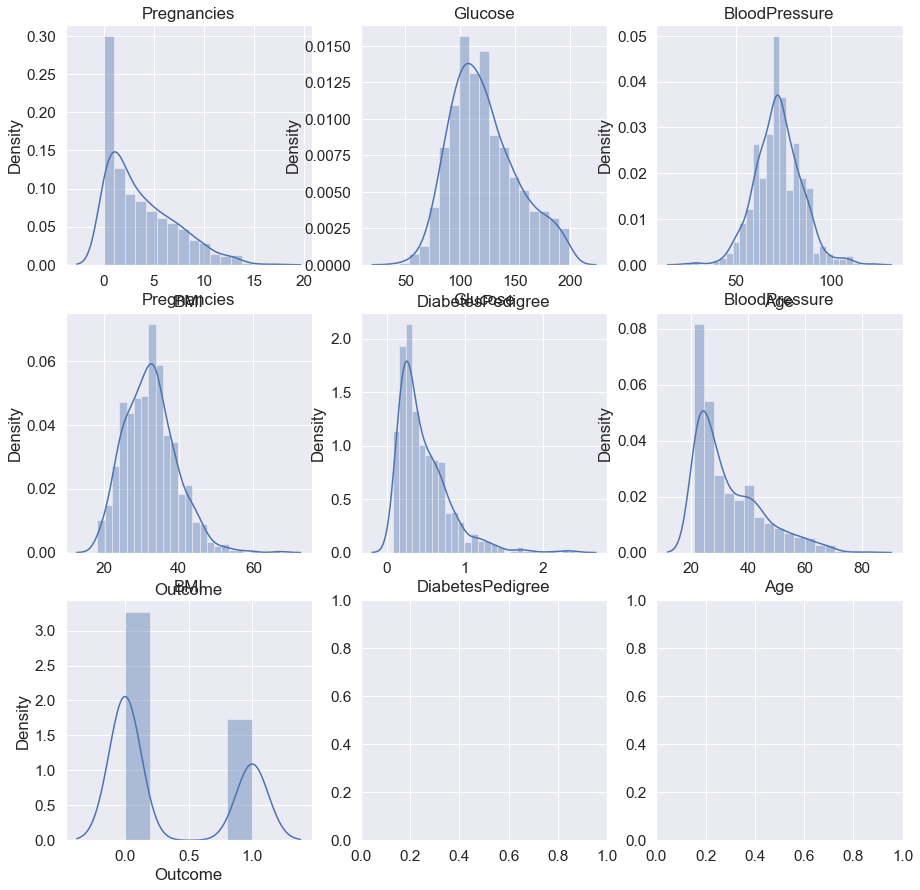

In [363]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)   
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, df.columns):
    sns.distplot(df[col], ax = ax)
    ax.set_title(col)

<AxesSubplot:xlabel='DiabetesPedigree'>

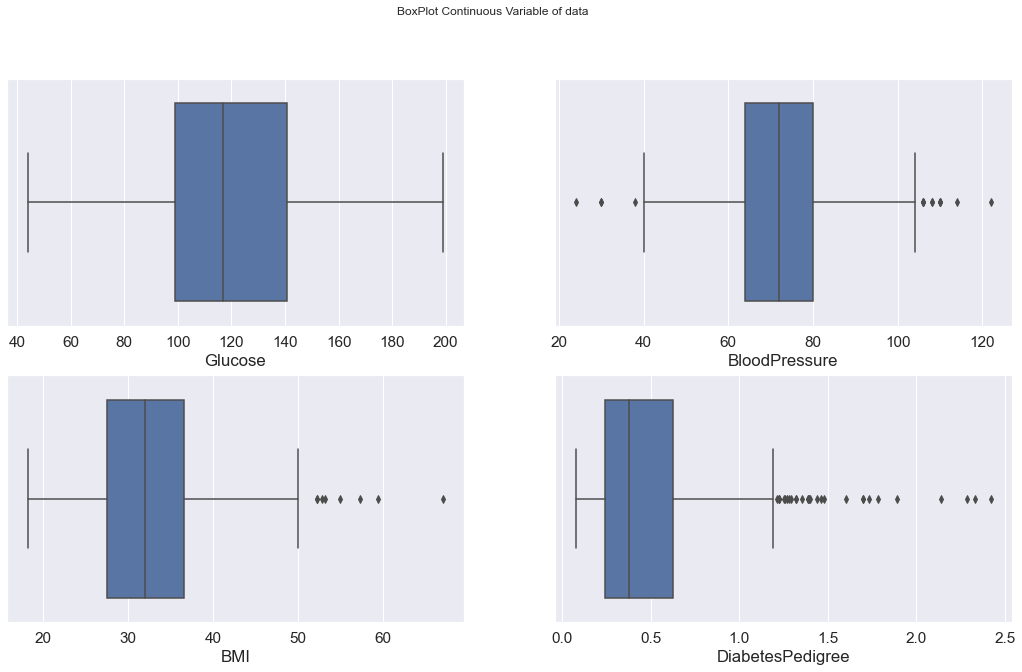

In [365]:
fig, axes = plt.subplots(2, 2, sharey=False,figsize=(18, 10))
  
fig.suptitle('BoxPlot Continuous Variable of data')
  
sns.boxplot(ax=axes[0, 0], x=df.Glucose)
sns.boxplot(ax=axes[0, 1], x=df.BloodPressure)
sns.boxplot(ax=axes[1, 0], x=df.BMI)
sns.boxplot(ax=axes[1, 1], x=df.DiabetesPedigree)


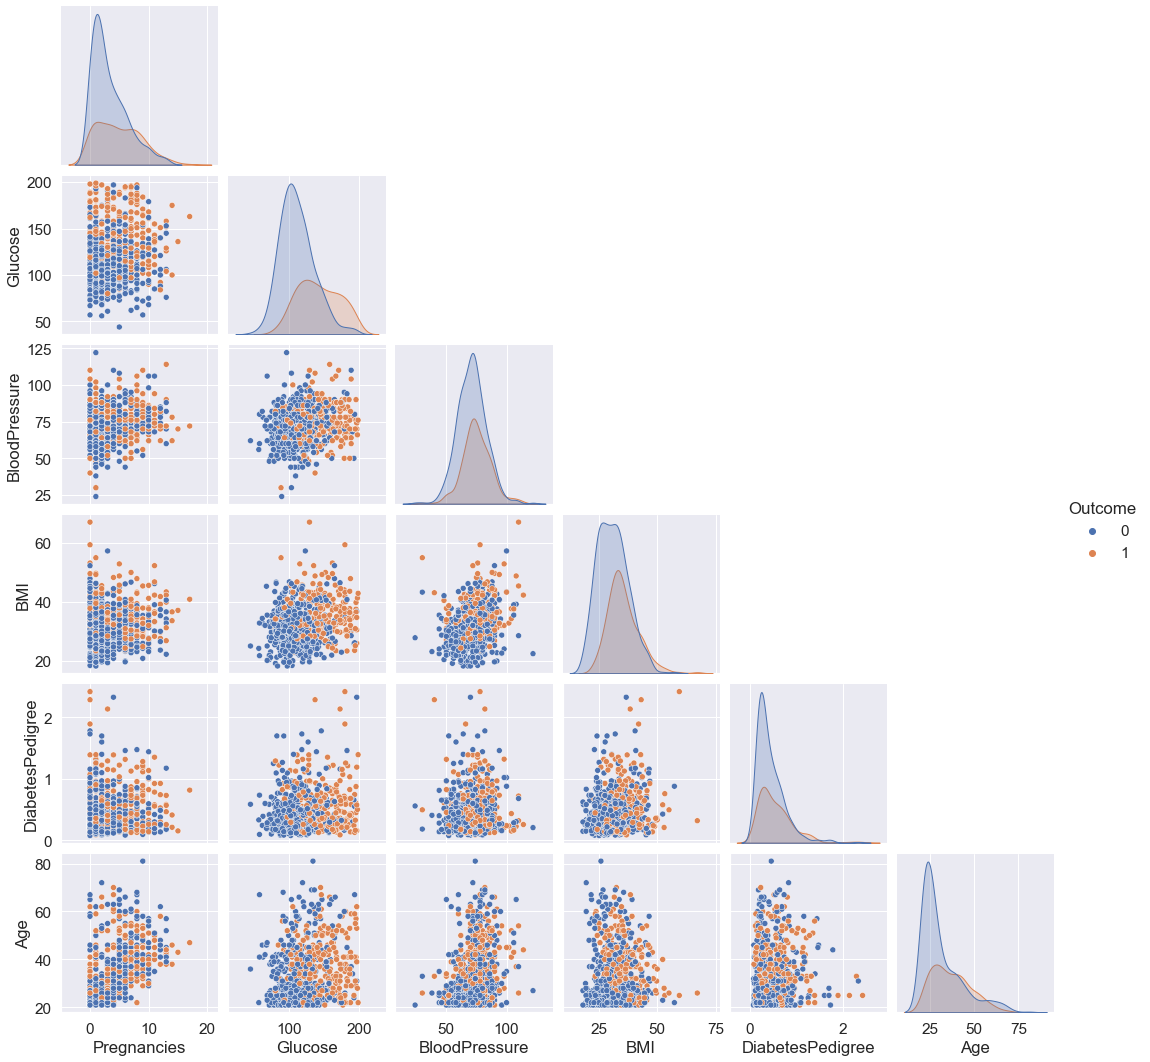

In [366]:
sns.pairplot(df,hue="Outcome",corner=True)

Pregnancies                               
               mean median min max      skew count
Outcome                                           
0          3.281633      2   0  13  1.124251   490
1          4.903846      4   0  17  0.505506   260

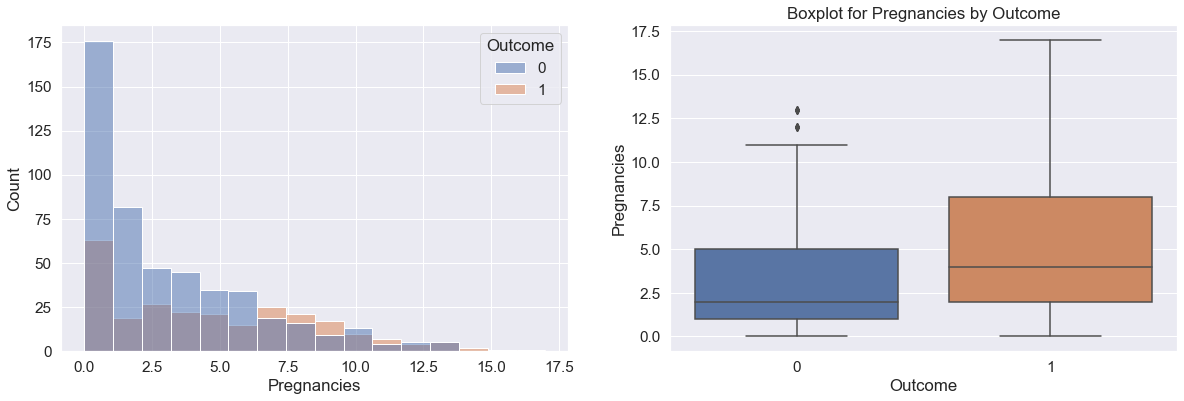

In [368]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="Pregnancies",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.Pregnancies).set_title("Boxplot for Pregnancies by Outcome")


df[["Outcome","Pregnancies"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

Glucose                                
               mean median min  max      skew count
Outcome                                            
0        110.724490  107.5  44  197  0.649058   490
1        141.857692  140.0  78  199  0.108427   260

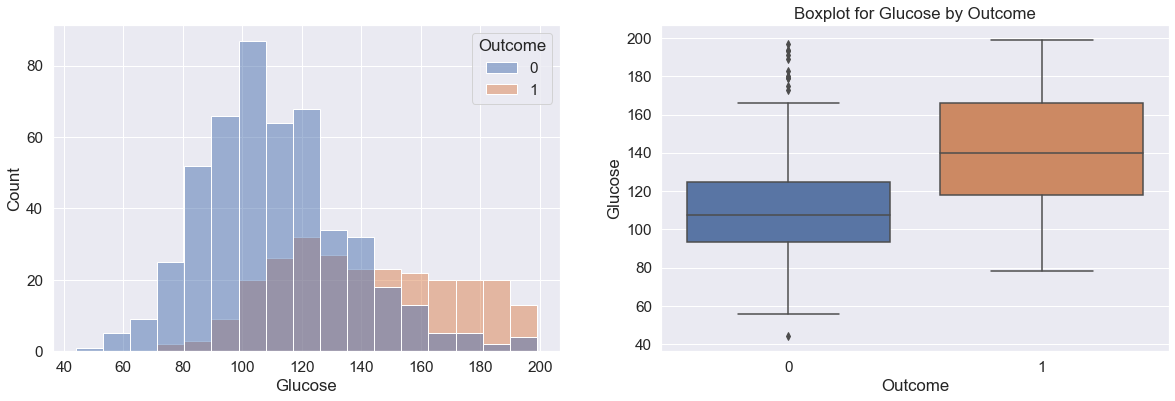

In [369]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="Glucose",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.Glucose).set_title("Boxplot for Glucose by Outcome")


df[["Outcome","Glucose"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

BloodPressure                                
                 mean median min  max      skew count
Outcome                                              
0           70.910204     72  24  122  0.152373   490
1           75.042308     74  30  114  0.138836   260

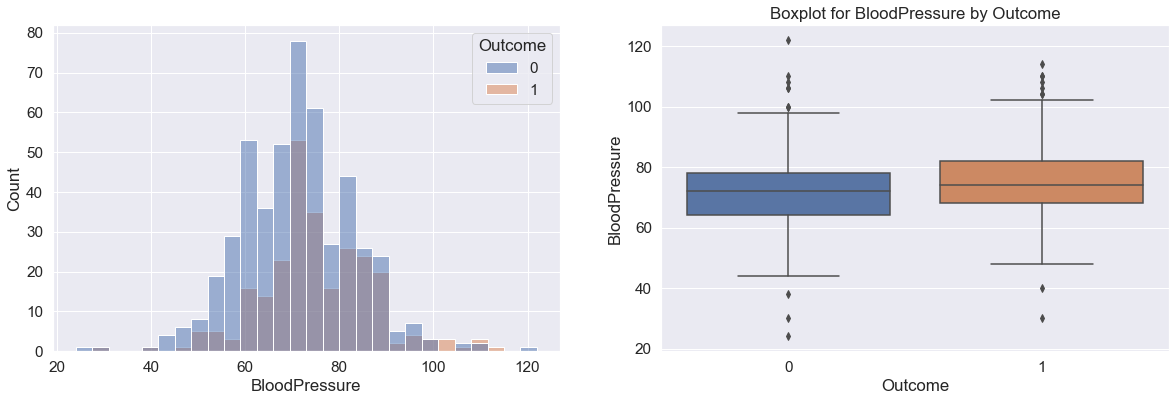

In [370]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="BloodPressure",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.BloodPressure).set_title("Boxplot for BloodPressure by Outcome")


df[["Outcome","BloodPressure"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

BMI                                   
              mean median   min   max      skew count
Outcome                                              
0        30.874286   30.4  18.2  57.3  0.469758   490
1        35.357308   34.2  22.9  67.1  1.041210   260

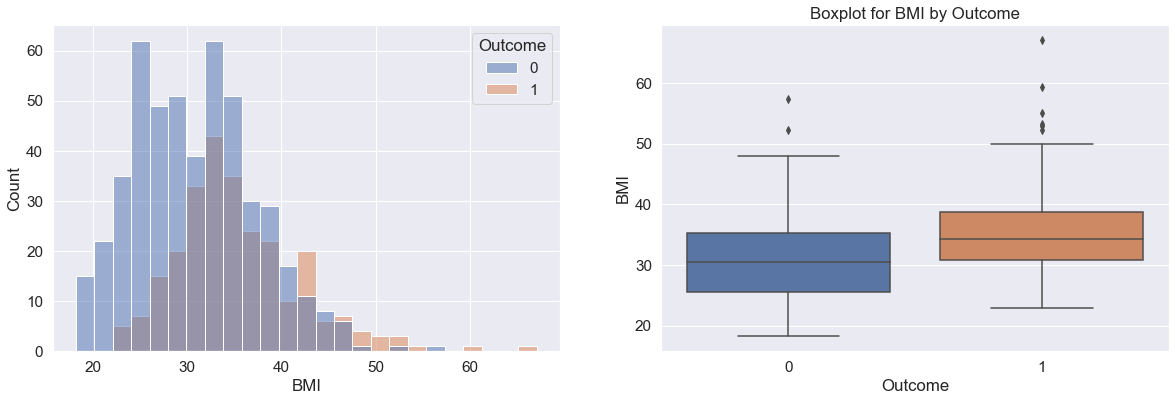

In [371]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="BMI",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.BMI).set_title("Boxplot for BMI by Outcome")


df[["Outcome","BMI"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

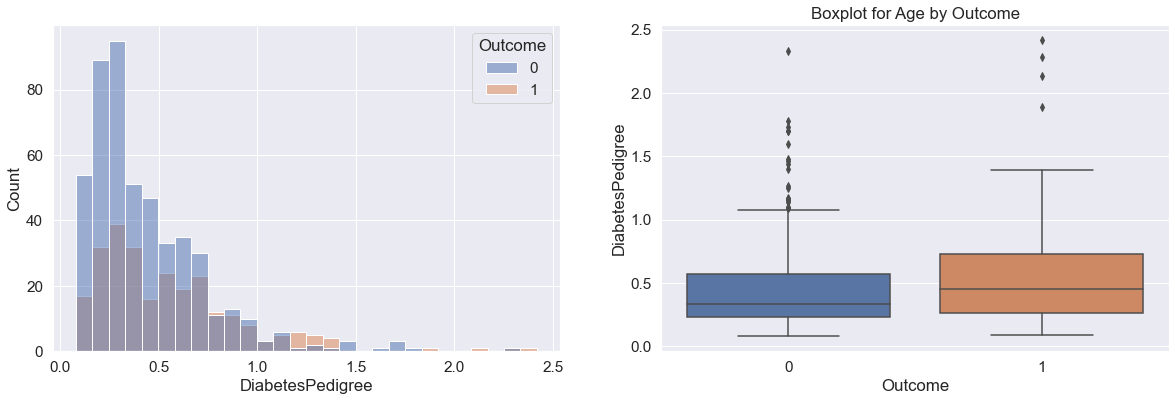

In [379]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="DiabetesPedigree",data = df, hue="Outcome")
plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.DiabetesPedigree).set_title("Boxplot for Age by Outcome")

Age                               
              mean median min max      skew count
Outcome                                          
0        31.181633     27  21  81  1.564764   490
1        36.907692     36  21  70  0.589011   260

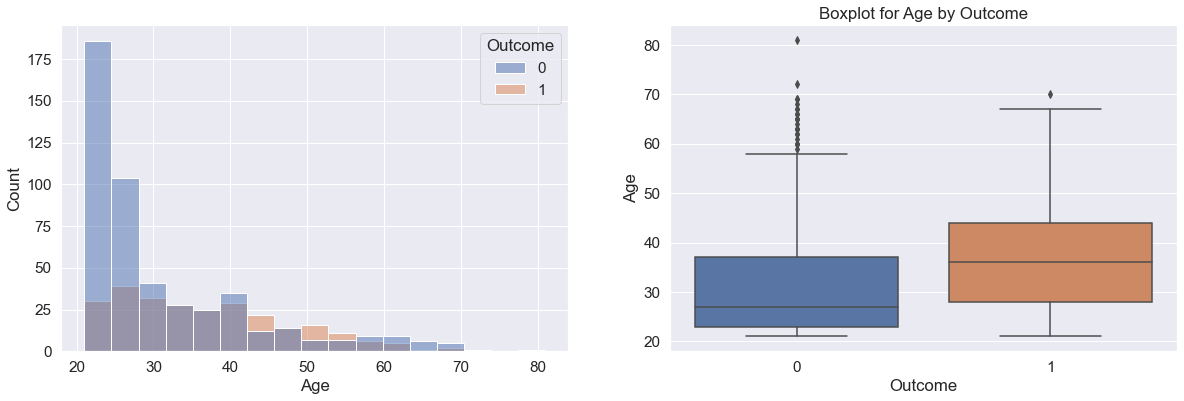

In [378]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="Age",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.Age).set_title("Boxplot for Age by Outcome")


df[["Outcome","Age"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

In [280]:
df1 = df.copy()

In [281]:
new_lis = []
for i in df['Pregnancies']:
    if i<3:
        new_lis.append(0)
    else:
        new_lis.append(1)
        
df['ThreeOrMore'] = new_lis

In [282]:
df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome,ThreeOrMore
0,6,148,72,33.6,0.627,50,1,1
1,1,85,66,26.6,0.351,31,0,0
2,8,183,64,23.3,0.672,32,1,1
3,1,89,66,28.1,0.167,21,0,0
4,0,137,40,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...
745,12,100,84,30.0,0.488,46,0,1
746,1,147,94,49.3,0.358,27,1,0
747,1,81,74,46.3,1.096,32,0,0
748,3,187,70,36.4,0.408,36,1,1


## Fitting regression model and finding probability

In [283]:

X = df['ThreeOrMore'].values
X = X.reshape(-1,1)
y = df['Outcome'].values
y = y.reshape(-1,1)

In [284]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [285]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [286]:

accuracy = classifier.score(X,y)
print(accuracy)

0.6533333333333333


In [287]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.6466666666666666

In [288]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[97  0]
 [53  0]]


In [289]:
#dont run
# Creating a new dataframe with ThreeOrMoreKids and Outcome column:
Out_df = df[['ThreeOrMore','Outcome']]

# Calculating pivot_table
pd.pivot_table(Out_df, values='Outcome', index=['ThreeOrMore'],
                    columns=['Outcome'], aggfunc=len)

Outcome,0,1
ThreeOrMore,,
0,258,82
1,232,178


In [290]:
# here we can see that 82 women have diabates with less than 3 children and 178 have diabates with more than 3 children
# We need to use the formula of conditional probability                                                                                                                                                                                                                                              
# first lets calculate the probability of getting diabities and having 2 or less children
P_D_2 = 82/len(Out_df)
# now let's calculate probability of getting diabities and having 3 or more children
P_D_3 = 178/len(Out_df)
# probability of having 2 more less children
P_2 = (258+82)/len(Out_df)
# probabioity of having 3 or more children
P_3 = (232+178)/len(Out_df)

# now we will calculate the conditional probability 
# we will use the formula p(a|b) = p(a∩b)/p(b)
P_D_Given_2 = (P_D_2)/(P_2)
# probability of getting diabates given 3 or more children
P_D_Given_3 = (P_D_3)/(P_3)

print("The probability that getting diabetes, given that you have two or fewer children", P_D_Given_2 )
print("The probability that getting diabetes, given that you have three or more children",P_D_Given_3)

The probability that getting diabetes, given that you have two or fewer children 0.24117647058823533
The probability that getting diabetes, given that you have three or more children 0.4341463414634147


In [291]:
#Alternatively we can also use predict_proba function to calculate the probability
pred = classifier.predict_proba(X)
print(pred)

[[0.56414632 0.43585368]
 [0.76309593 0.23690407]
 [0.56414632 0.43585368]
 ...
 [0.76309593 0.23690407]
 [0.56414632 0.43585368]
 [0.56414632 0.43585368]]


In [292]:
# here first column represents not getting diabates and second column represents getting diabates
print(pred)

[[0.56414632 0.43585368]
 [0.76309593 0.23690407]
 [0.56414632 0.43585368]
 ...
 [0.76309593 0.23690407]
 [0.56414632 0.43585368]
 [0.56414632 0.43585368]]


In [293]:
df.insert(loc = 8,
          column = 'Diabates_prob',
          value = pred[:,1])

In [294]:
#df.drop('col1', inplace=True, axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome,ThreeOrMore,Diabates_prob
0,6,148,72,33.6,0.627,50,1,1,0.435854
1,1,85,66,26.6,0.351,31,0,0,0.236904
2,8,183,64,23.3,0.672,32,1,1,0.435854
3,1,89,66,28.1,0.167,21,0,0,0.236904
4,0,137,40,43.1,2.288,33,1,0,0.236904


## Part 4 - Using new data for testing

In [295]:

ToPredict = pd.read_csv('ToPredict.csv')

In [296]:
ToPredict.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,4,136,70,0,0,31.2,1.182,22
1,1,121,78,39,74,39.0,0.261,28
2,3,108,62,24,0,26.0,0.223,25
3,0,181,88,44,510,43.3,0.222,26
4,8,154,78,32,0,32.4,0.443,45


In [297]:
# let's drop SkinThickenss and Insulin from this data as well
ToPredict.drop(['Insulin','SkinThickness'],axis=1,inplace=True)

In [298]:
# first let's decide which model should we use to predict the values in the second data
# we shall experiment on 3 models
# Logistic Regression
# Decision Tree regressor
# Random Forest Regressor
ToPredict1 = ToPredict.copy()
ToPredict2 = ToPredict.copy()
ToPredict3 = ToPredict.copy()

In [299]:
# Let's split the first data into training and testing excluding the out come column
X = df1.drop(['Outcome'],axis=1)
y = df1[['Outcome']]


In [300]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)
print(f"The shape of X_train is      {colored(X_train.shape,'yellow')}")
print(f"The shape of X_test is       {colored(X_test.shape,'yellow')}")
print(f"The shape of y_train is      {colored(y_train.shape,'yellow')}")
print(f"The shape of y_test is       {colored(y_test.shape,'yellow')}")

The shape of X_train is      (600, 6)
The shape of X_test is       (150, 6)
The shape of y_train is      (600, 1)
The shape of y_test is       (150, 1)


In [301]:
X.isnull().any()

Pregnancies         False
Glucose             False
BloodPressure       False
BMI                 False
DiabetesPedigree    False
Age                 False
dtype: bool

In [302]:
#LEt's use all the column as variables to predict out come 
models = [
    ('DecisionTreeRegressor',DecisionTreeRegressor()),
    ('LogisticRegression',LogisticRegression()),
    
]

print("The accuracy scores of the models are :")
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{colored(model_name,'blue')}")
    print(f"{colored(accuracy_score(y_test,y_pred), 'yellow')}")
    
    rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    print("\nRMSE: ", rmse)
    print('MSE test: %.3f\n' % mean_squared_error(y_test, y_pred))
    

The accuracy scores of the models are :
DecisionTreeRegressor
0.7333333333333333

RMSE:  0.516
MSE test: 0.267

LogisticRegression
0.7733333333333333

RMSE:  0.476
MSE test: 0.227



/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [303]:
#lets use logictic regression and see which variables are useful for the outcome
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [304]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7733333333333333


In [305]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [306]:
conf_mat

array([[87, 17],
       [17, 29]])

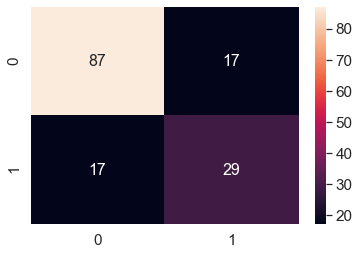

In [307]:
df_cm = pd.DataFrame(conf_mat, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [308]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       104
           1       0.63      0.63      0.63        46

    accuracy                           0.77       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.77      0.77      0.77       150



<AxesSubplot:title={'center':'Feature Importance'}>

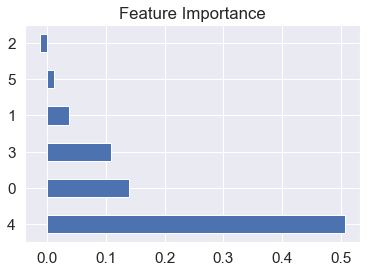

In [309]:
importance = classifier.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [310]:
df = pd.DataFrame(df.columns[:-1])
df['Values'] = feat_importances
df
# we can see that DiabatesPedigree, BMI and Pregnancies have the higest feature values so we will select those

,0,Values
0,Pregnancies,0.139080
1,Glucose,0.036793
2,BloodPressure,-0.011173
3,BMI,0.108087
4,DiabetesPedigree,0.506730
5,Age,0.011442
6,Outcome,NaN
7,ThreeOrMore,NaN


In [311]:
# Now let's choose one vartiable at a time
# let's choose these 3 variable to see their accuray and confustion matrix
X = df1[['Pregnancies','BMI','DiabetesPedigree']]
y = df1[['Outcome']]

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)

In [313]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.64


/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


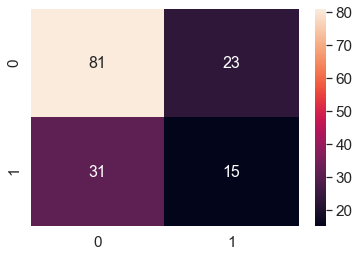

In [314]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf_mat, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [315]:
# let's choose a single variable which is glucose and diabatesPedigree
X = df1[['Glucose','BloodPressure']]
y = df1[['Outcome']]

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)

In [317]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.74


/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


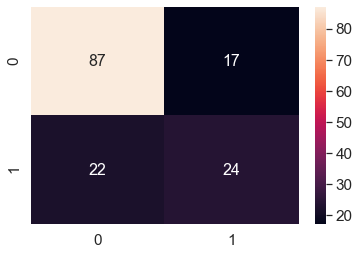

In [318]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf_mat, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## Now let's perdict the outcome for the Topredict dataset and also their probabilities

In [319]:
ToPredict.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age
0,4,136,70,31.2,1.182,22
1,1,121,78,39.0,0.261,28
2,3,108,62,26.0,0.223,25
3,0,181,88,43.3,0.222,26
4,8,154,78,32.4,0.443,45


In [320]:
# we will take this dataset as test set 
X_train = df1.drop(['Outcome'],axis=1)
X_test = ToPredict
y_train = df1['Outcome']

In [321]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)


LogisticRegression()

In [322]:
y_pred = classifier.predict(X_test)

In [323]:
y_pred

array([0, 0, 0, 1, 1])

In [324]:
prob = classifier.predict_proba(X_test)

In [325]:
prob

array([[0.50509377, 0.49490623],
       [0.7139111 , 0.2860889 ],
       [0.90574716, 0.09425284],
       [0.20116719, 0.79883281],
       [0.28771717, 0.71228283]])

In [326]:
ToPredict1['Predicted Outcome'] = y_pred

In [327]:
ToPredict1['Probability of getting Diabetes'] = prob[:,1]

In [328]:
ToPredict1

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Predicted Outcome,Probability of getting Diabetes
0,4,136,70,31.2,1.182,22,0,0.494906
1,1,121,78,39.0,0.261,28,0,0.286089
2,3,108,62,26.0,0.223,25,0,0.094253
3,0,181,88,43.3,0.222,26,1,0.798833
4,8,154,78,32.4,0.443,45,1,0.712283


In [383]:
# now let's used glucose and blood pressure as variables 
X_test = df1[['Glucose','BloodPressure']]
X_test = ToPredict
y_train = df1['Outcome']

In [384]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1]


In [385]:
prob = classifier.predict_proba(X_test)

In [386]:
ToPredict2['Predicted Outcome'] = y_pred

In [387]:
ToPredict2['Probability of getting Diabetes'] = prob[:,1]

In [388]:
ToPredict2

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Predicted Outcome,Probability of getting Diabetes
0,4,136,70,31.2,1.182,22,0,0.494906
1,1,121,78,39.0,0.261,28,0,0.286089
2,3,108,62,26.0,0.223,25,0,0.094253
3,0,181,88,43.3,0.222,26,1,0.798833
4,8,154,78,32.4,0.443,45,1,0.712283


In [389]:
# now let's used glucose and blood pressure as variables 
X_test = df1['Glucose']
X_test = ToPredict
y_train = df1['Outcome']

In [390]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1]


In [391]:
prob = classifier.predict_proba(X_test)

In [392]:
ToPredict3['Predicted Outcome'] = y_pred

In [393]:
ToPredict3['Probability of getting Diabetes'] = prob[:,1]

In [394]:
ToPredict3

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Predicted Outcome,Probability of getting Diabetes
0,4,136,70,31.2,1.182,22,0,0.494906
1,1,121,78,39.0,0.261,28,0,0.286089
2,3,108,62,26.0,0.223,25,0,0.094253
3,0,181,88,43.3,0.222,26,1,0.798833
4,8,154,78,32.4,0.443,45,1,0.712283
